In [4]:
import random as rd
import numpy as np
import scipy as sp

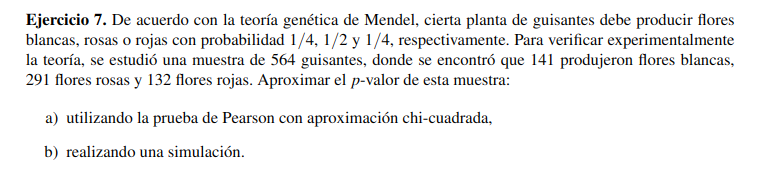

$$
p_1 = 1/4 \; N_1 = 141 \\
p_2 = 1/2 \; N_2 = 291 \\
p_3 = 1/4 \; N_3 = 132 \\
$$

El estadistico para el test chi-cuadrado es:
$$
T = \frac{(N_1 - n p_1)^2}{n p_1} + \frac{(N_2 - n p_2)^2}{n p_2} + \frac{(N_3 - n p_3)^2}{n p_3} = \\
T = \frac{(141 - 564 \cdot 1/4 )^2}{564 \cdot 1/4} + \frac{(291 - 564 \cdot 1/2)^2}{564 \cdot 1/2} + \frac{(132 - 564 \cdot 1/4)^2}{564 \cdot 1/4} = 0.861702
$$

El p-valor sera:
$$
P_{H0}(T \geq t) = P(\chi^2_{2} \geq 0.861702) =\\
1 - P(\chi^2_{2} \leq 0.861702)

$$

In [14]:
def estadistico(n, pi,Ni):
    t = 0
    for i in range(len(Ni)):
        t += ((Ni[i] - n*pi[i])**2)/(n*pi[i])
    return t

In [115]:
n = 564
pi = [0.25, 0.5, 0.25]
Ni = [141, 291, 132]
t = estadistico(n, pi, Ni)
p_v = 1 - sp.stats.chi2.cdf(t, len(Ni)-1)
print(f"p-valor: {p_v:.4f}")

p-valor: 0.6500


In [120]:
def gen_va():
    u = rd.random()
    if u < 0.5:
        return 1
    elif u < 0.75:
        return 0
    else:
        return 2

def gen_muestra(nsims):
    ni = np.zeros(3)
    for i in range(nsims):
        pi[gen_va()] += 1
    return ni

In [80]:
print(gen_muestra(564))

[143. 270. 151.]


In [82]:
def sim_p_valor(nsims, n, pi, ni):
    t_est = 0
    t = estadistico(n, pi, ni)
    for i in range(nsims):
        muestra = gen_muestra(n) # genero una nueva muestra de tamaño n
        t1 = estadistico(n, pi, muestra)  # calculo un nuevo estadistico

        if t1 >= t:
            t_est += 1

    return t_est/nsims

In [119]:
n = 564
pi = [0.25, 0.5, 0.25]
Ni = [141, 291, 132]
nsims = 1000
p_v = sim_p_valor(nsims, n, pi, Ni)
print(f"p-valor simulado: {p_v:.4f}")

p-valor simulado: 0.6520
